<a href="https://colab.research.google.com/github/jrickey24/MLDatasets/blob/main/NaiveBayesEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

LOAD & CLEAN THE DATASET

In [357]:
# Import From GitHub Repo Raw Text
csv_url_1 = 'https://raw.githubusercontent.com/jrickey24/MLDatasets/main/Airlines.csv' # Original File With All Airlines
csv_url_2 = 'https://raw.githubusercontent.com/jrickey24/MLDatasets/main/AirlinesRevised.csv' # AA, AS, DL, UA, US Airlines Only
csv_url_3 = 'https://raw.githubusercontent.com/jrickey24/MLDatasets/main/Airlines_AA_DL_UA.csv' # AA, DL, UA Airlines Only
csv_url_4 = 'https://raw.githubusercontent.com/jrickey24/MLDatasets/main/Airlines_OG.csv' # OG Full Data Set
df = pd.read_csv(csv_url_4)
# Removing id & Flight(number)as these aren't useful classifiers
df.drop(['id', 'Flight', 'Length'], axis='columns', inplace=True)
# Removing Time(duration of flight) & Length(distance of flight)
# Time & Length have an implicit relationship with AirportFrom and AirportTo
#df.drop(['id', 'Flight', 'Time', 'Length'], axis='columns', inplace=True)
df.head(10) # Read First 10 Rows From CSV File

,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Delay
0,CO,SFO,IAH,3,15,1
1,US,PHX,CLT,3,15,1
2,AA,LAX,DFW,3,20,1
3,AA,SFO,DFW,3,20,1
4,AS,ANC,SEA,3,30,0
5,CO,LAX,IAH,3,30,1
6,DL,LAX,MSP,3,30,0
7,DL,PHX,DTW,3,30,0
8,DL,SFO,MSP,3,35,1
9,AA,LAS,ORD,3,40,1


BASIC EXPLORATORY DATA ANALYSIS (EDA)

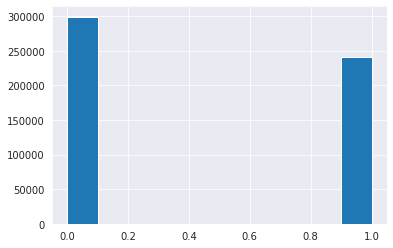

In [348]:
df["Delay"].hist()

In [358]:
target=df.Delay
inputs=df.drop('Delay', axis='columns') # Remove Delay column from inputs
#inputs.head(10)

In [359]:
# Encode Non-numeric classifiers for calculations
airline_dummies = pd.get_dummies(inputs.Airline)
airport_from_dummies = pd.get_dummies(inputs.AirportFrom)
airport_to_dummies = pd.get_dummies(inputs.AirportTo)

In [360]:
# Concat Dummies with Inputs
inputs = pd.concat([inputs,airline_dummies,airport_from_dummies,airport_to_dummies], axis='columns')

In [361]:
# Drop the String columns as we'll calculate inputs using dummies for all non-numeric classifiers
inputs.drop(['Airline', 'AirportFrom', 'AirportTo'], axis='columns', inplace=True)

In [353]:
# Check if NaN values present in any input columns
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [389]:
# Train and Test Model
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=.25)
model = CategoricalNB()
print("X Train: " + str(len(X_train)) + " X Test: " + str(len(X_test)) + " Inputs: " + str(len(inputs)))

X Train: 404537 X Test: 134846 Inputs: 539383


In [390]:
model.fit(X_train, y_train)

CategoricalNB()

In [391]:
model.score(X_test, y_test)

0.6363258828589651